### Problem Statement
  Ocean salinity is a crucial variable in understanding Earth's climate systems, yet it is becoming increasingly difficult to predict due to the compounding effects of rising global temperatures. Warmer climates accelerate ice melt, altering precipitation-evaporation patterns, leading to significant changes in ocean salinity that disrupt marine ecosystems, ocean currents, and global weather patterns. Accurately predicting salinity levels is essential to understanding and mitigating the acceleration of global warming that drives extreme climate events, but the complexity and variability of salinity make this a challenging task.
  
  To address this challenge by utilizing various machine learning approaches—such as linear regression, random forest regression, KNNeighbors, and decision tree models—it is possible to analyze large datasets of salinity and temperature, thus being able to predict ice melt and evaporation trends. Developing such models would enable the prediction of salinity levels under different climate scenarios, providing valuable insights into the potential impacts on ocean currents and climate stability. This project not only demonstrates the application of coding and data analysis to real-world problems but also contributes to the broader effort to understand and adapt to the impacts of rising global temperatures. I will predict Temperature with Salinity, in hopes that this can be used as a way to predict future salt levels, ultimately giving us some type of idea of the future of climate change.


###Dataset Description
  This data set is from Kaggle in CSV format. The original dataset had numerous unnecessary columns that I erased in order to solely focus on Salinity and Temperature and depth, for a brief moment. The information provided on the data set is from a California Oceanic Investigation department, it includes up to 50,000 samples of data from the 1900s- present. This data set will be very insightful on how predictive models can set the stage of future climate effects.


##### Prelimenary Examination/ Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
env= '/bottle.csv'
df = pd.read_csv(env, on_bad_lines='skip')

df.head()


<ipython-input-3-7ddf974d7868>:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(env, on_bad_lines='skip')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df = df.loc[:, numeric_cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 70 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Depthm       864863 non-null  int64  
 3   T_degC       853900 non-null  float64
 4   Salnty       817509 non-null  float64
 5   O2ml_L       696201 non-null  float64
 6   STheta       812174 non-null  float64
 7   O2Sat        661274 non-null  float64
 8   Oxy_µmol/Kg  661268 non-null  float64
 9   BtlNum       118667 non-null  float64
 10  RecInd       864863 non-null  int64  
 11  T_prec       853900 non-null  float64
 12  T_qual       23127 non-null   float64
 13  S_prec       817509 non-null  float64
 14  S_qual       74914 non-null   float64
 15  P_qual       673755 non-null  float64
 16  O_qual       184676 non-null  float64
 17  SThtaq       65823 non-null   float64
 18  O2Satq       217797 non-

I notice the abundance of unnecesary columns, of which will be dropped.

#### Exploratory Data Analysis

In [7]:
df['T_degC'].min()

1.44

In [8]:
df['T_degC'].max()

31.14

In [9]:
df['Salnty'].min()

28.431

In [10]:
df['Salnty'].max()

37.034

In [11]:
df['Salnty'].min()

28.431

In [12]:
df = df.sort_values(by='Salnty', ascending=True)
df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
769300,30768,769301,1,14.91,28.431,NaN,20.934,NaN,NaN,7.0,...,1.56,0.47,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN
769299,30768,769300,0,14.91,28.431,NaN,20.934,NaN,NaN,NaN,...,1.56,0.47,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419885,16073,419886,0,10.92,29.170,NaN,22.254,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459866,18237,459867,0,11.31,29.400,NaN,22.366,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457066,18139,457067,0,11.30,29.402,6.65,22.369,104.5,290.491,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810515,32287,810516,10,14.88,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,10,206.0,NaN,NaN,NaN,NaN,NaN,NaN
810524,32288,810525,10,15.10,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,10,220.0,NaN,NaN,NaN,NaN,NaN,NaN
811305,32315,811306,10,15.27,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,10,203.0,NaN,NaN,NaN,NaN,NaN,NaN
828253,32979,828254,0,13.58,NaN,6.15,NaN,NaN,NaN,NaN,...,0.96,0.21,0,200.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
y=df['Salnty'].mean
x=df['T_degC'].mean
print(df['T_degC'].mean())
print(df['T_degC'].median())

10.799676920014045
10.06


In [14]:
print(df['Salnty'].mean())
print(df['Salnty'].median())

33.84035029388056
33.863


In [15]:
columns_to_keep = [ 'T_degC', 'Salnty', 'Depthm']
df = df[columns_to_keep]
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 864863 entries, 769300 to 828290
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  853900 non-null  float64
 1   Salnty  817509 non-null  float64
 2   Depthm  864863 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 26.4 MB


The minimum temperature of the dataset is 1.44 degrees celsius, with a max of 31.14. This shows us the difference in temperature that can occur in the region, California. Salinity ranges from 28.431-37.034. According to ATI North America, 37 Salinity is considered very high, this could be in correlation to the high water temperature seen above, we will further investigate this idea. I also sorted and dropped columns just to have a better idea of the numbers I was working with to see what I should expect. The mean and median temperature are about the same, the same goes for Salinity. This tells us that the data for both are evenly distributed and symmetrical.

## Initial Visualizations

Text(0.5, 1.0, 'Histplot of Temperature')

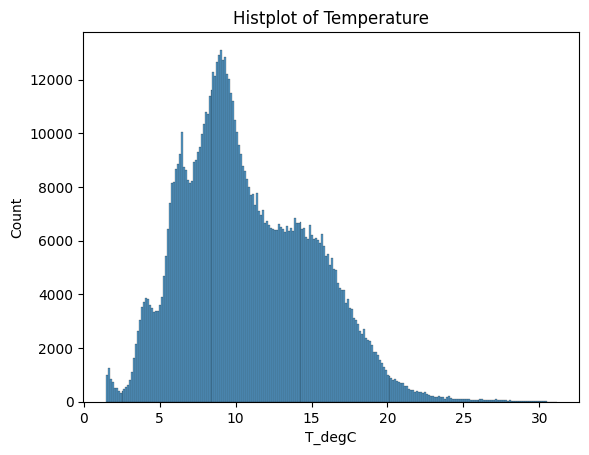

In [16]:
sns.histplot(data = df, x = 'T_degC')
plt.title('Histplot of Temperature')

Text(0.5, 1.0, 'Histplot of Salinity')

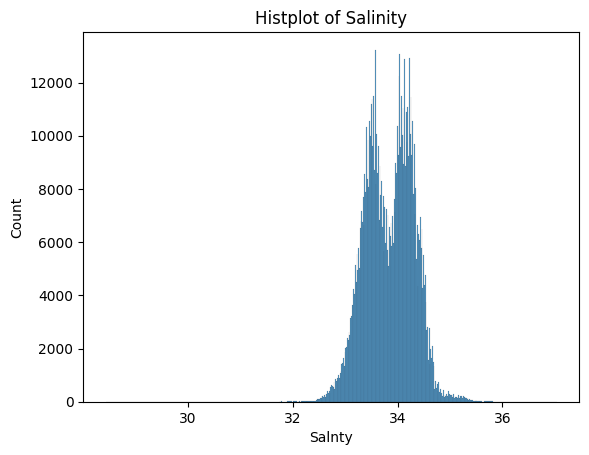

In [17]:
sns.histplot(df['Salnty'])
plt.title('Histplot of Salinity')

Text(0.5, 1.0, 'Salinity vs Temperature')

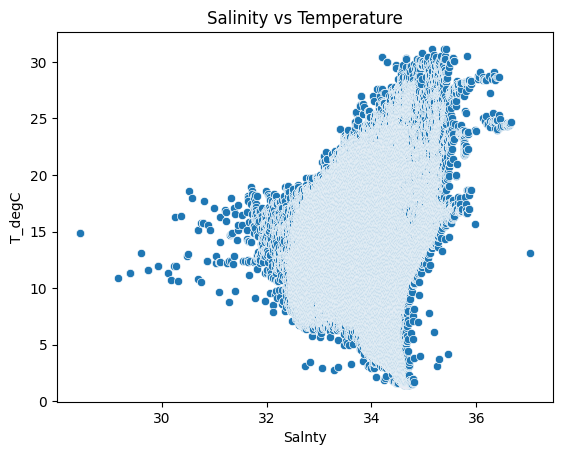

In [18]:
sns.scatterplot(data = df, x = 'Salnty', y = 'T_degC')
plt.title('Salinity vs Temperature')

Text(0.5, 1.0, 'Salinity vs Depth')

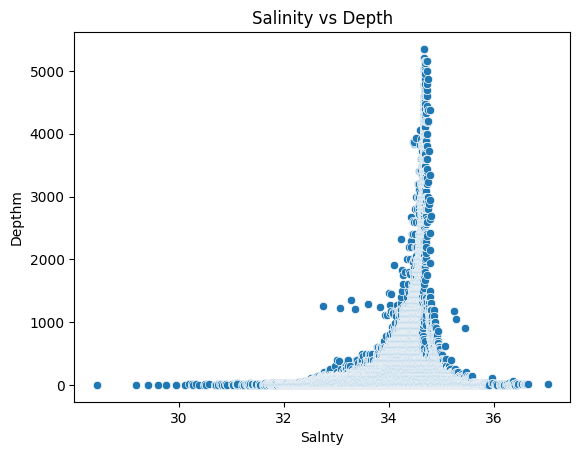

In [73]:
sns.scatterplot(data = df, x = 'Salnty', y = 'Depthm')
plt.title('Salinity vs Depth')

The Histplot of temperature gives us perspective on how temperature ranges. Comparing it to the Salinity histplot, we see that most of the Salinity values are between 32 and 35, giving us insight on how high the Salinity is in the region. With this information, it makes sense that there are usually higher temperatures, but there is something off. The temperature is usually below 20 degrees according to the data, this tells us that the correlation between Salinity and temperature could be different than what studies have suggested, the idea that high salinity=high temperature. With the Salinity vs Temperature scatter plot, we see that all of the temperature values result in around 32-34 salinity. We also see a slight increase in temperature as salinity increases, the cluster curves slightly. Comparing Salinity and Depth comes to mind when thinking about the ocean, it is not all at the same depth. There is some correlation between Salinity and Depth. According to the data, at peak depth salinity is around 35 and depth is lower with salinity below 33 and above about 35.8. This suggests that depth and salinity has some correlation, but we are not investigating this aspect, but this would be a good aspect to investigate to connect to global warming; however, we can’t control the oceans depth and increased temperature will cause increased sea levels, so we have to figure out the temperature aspect first to approach this new idea.


#Modeling and Interpretations

In [84]:

y = df['T_degC']


y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)


y_train_mean = y_train.mean()


y_pred_baseline = np.repeat(y_train_mean, len(y_test))


baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 17.878791794930986


### Linear Regression

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [75]:
df = df.dropna(subset=['T_degC', 'Salnty'])


X = df[['Salnty']]
y = df['T_degC']


In [76]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline




imputer = SimpleImputer(strategy='mean')


X_train = df[['Salnty']]
X_train_imputed = imputer.fit_transform(X_train)
y_train = df['T_degC']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_imputed)

regressor = LinearRegression()
regressor.fit(X_scaled, y_train)

LinearRegression()

In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numerical_features = ['Salnty']
categorical_features = []

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()),
])

X_train, X_test, y_train, y_test = train_test_split(df[['Salnty']], df['T_degC'], test_size=0.2, random_state=42)


pipe.fit(X_train, y_train)


y_test_preds = pipe.predict(X_test)

X_train = df[['Salnty']]
y_train = df['T_degC']

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Salnty']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', LinearRegression())])

In [79]:
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = pipe.named_steps['preprocessor'].get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
num__Salnty,-2.134712


In [80]:
lr.intercept_

10.860287286290273

In [81]:
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

13.29301614963518

In [82]:
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

13.290988227423695

In [83]:
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.51235


The analysis of the linear regression model reveals that salinity has a notable relationship with temperature, with a coefficient of -2.1347. This coefficient indicates that for every one-unit increase in salinity, the model predicts a decrease in temperature by 2.1347°C. This negative relationship suggests that higher salinity levels are associated with lower water temperatures, supporting the hypothesis that salinity might influence temperature in a way that could slow the impacts of global warming. However, the underlying complexity of this relationship is not fully captured, as indicated by the model's performance metrics.
The Mean Squared Error (MSE) of the model is 13.29, which represents an improvement over the baseline MSE of 17.789. The reduction in MSE signifies that the model is a significant step forward, indicating that salinity has some predictive power over temperature. Nevertheless, the MSE of 13.29 still reflects an average error of 3.65°C in predictions, suggesting that the model is not perfect. Given the context that increased salinity can contribute to coral reef deterioration—an important issue in the fight against climate change—the error margin of 3.65°C is significant. This level of error means that predictions based on this model could still be misleading, causing scientific efforts to appear more effective than they actually are. The lack of precision in the model could result in false confidence in strategies aimed at mitigating global warming, potentially hindering progress.
The correlation coefficient (r) of 0.51 further suggests a moderate positive linear relationship between salinity and temperature. While the relationship is statistically significant, it is not strong enough to offer precise predictions, especially with the 3.65°C error margin. This moderate correlation suggests that while salinity does have an impact on temperature, other factors likely play a more substantial role in determining oceanic temperatures.
In conclusion, the model indicates that increased salinity is associated with a decrease in temperature, offering some insight into potential ways to mitigate global warming. However, the 3.65°C error and the moderate correlation suggest that there are other significant factors influencing temperature that the model does not account for. To better inform global warming efforts, further refinement of the model and the inclusion of additional variables are necessary to reduce prediction error and improve accuracy. Without these improvements, the effectiveness of climate mitigation strategies based on this model may be overstated.


##KNneighbors Regression Model

In [29]:
from sklearn.neighbors import KNeighborsRegressor
X = df[['Salnty']]
y = df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [30]:
numerical_features = ['Salnty']
categorical_features = []


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])



pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])
X = df[['Salnty']]
y = df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30]}


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Salnty']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'model__n_neighbors': 30}

In [32]:
knn = grid_search.best_estimator_

In [33]:
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

10.139926296094876

In [34]:
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

10.32147678313244

In [35]:
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.885654


The K-Nearest Neighbors (KNN) has MSE values of 10.13993 on the training data and 10.3215 on the testing data. The corresponding error fluctuations are approximately 3.18°C for the training set and 3.22°C for the testing set. These values indicate that the model is, on average, off by about 3.2°C when predicting the temperature from salinity. The MSE values on both the training and testing sets are quite close to each other, suggesting that the model is generalizing well. There is minimal overfitting, as evidenced by the small difference between training and testing errors. This indicates that the model is not overly complex and does not memorize the training data, but instead captures relationships between the features and the target variable. With an error of around 3.2°C, the model’s predictions are off by about 9% of the total range of temperature (which spans from 1°C to 34°C). Depending on the application, this level of error would be considered acceptable. The analysis indicates that salinity can predict temperature to a reasonable extent, but it is not the sole factor influencing temperature. The KNN regression model was able to predict temperature with an error of approximately 3.2°C on both training and testing data, showing that salinity provides a meaningful relationship with temperature. However, the 3.2°C prediction error suggests that while salinity is a strong predictor, it does not account for all the variability in temperature.
Salinity appears to capture some of the main trends in temperature, as the model's error is relatively small, particularly when compared to the baseline model that simply predicts the mean temperature. This suggests that salinity contributes to the temperature variations, but there are likely other environmental factors or variables that influence temperature that are not captured in the model.
The fact that the model performs similarly on both the training and testing sets, without significant overfitting, further implies that salinity is a significant predictor of temperature, but that its influence is not exhaustive. Other variables, possibly including atmospheric pressure, humidity, or geographical factors, could be influencing temperature in ways that the model is not able to capture with just salinity.
With an r value of .885, there is a strong positive linear relationship between Salinity and Temperature.
In conclusion, while salinity can explain a portion of the temperature variations, its predictive power is limited. The model’s performance highlights the need for additional data and factors to improve accuracy. Incorporating other features or exploring more advanced models that account for multiple influences on temperature could improve predictions and better capture the complexity of temperature dynamics.


##Decision Tree

In [36]:

ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,categorical_features), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

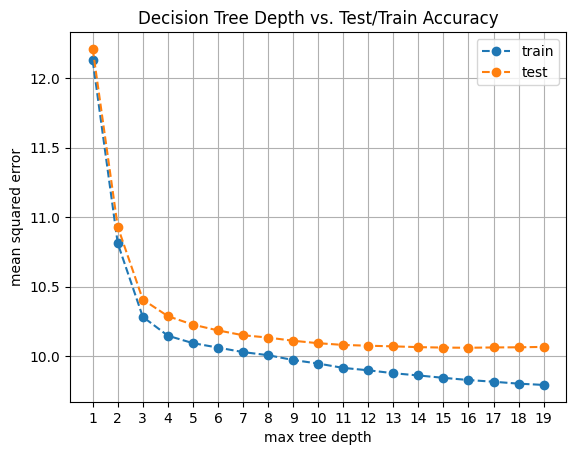

In [37]:
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [38]:
dtree = DecisionTreeRegressor(max_depth = 3).fit(X_train_encoded, y_train)

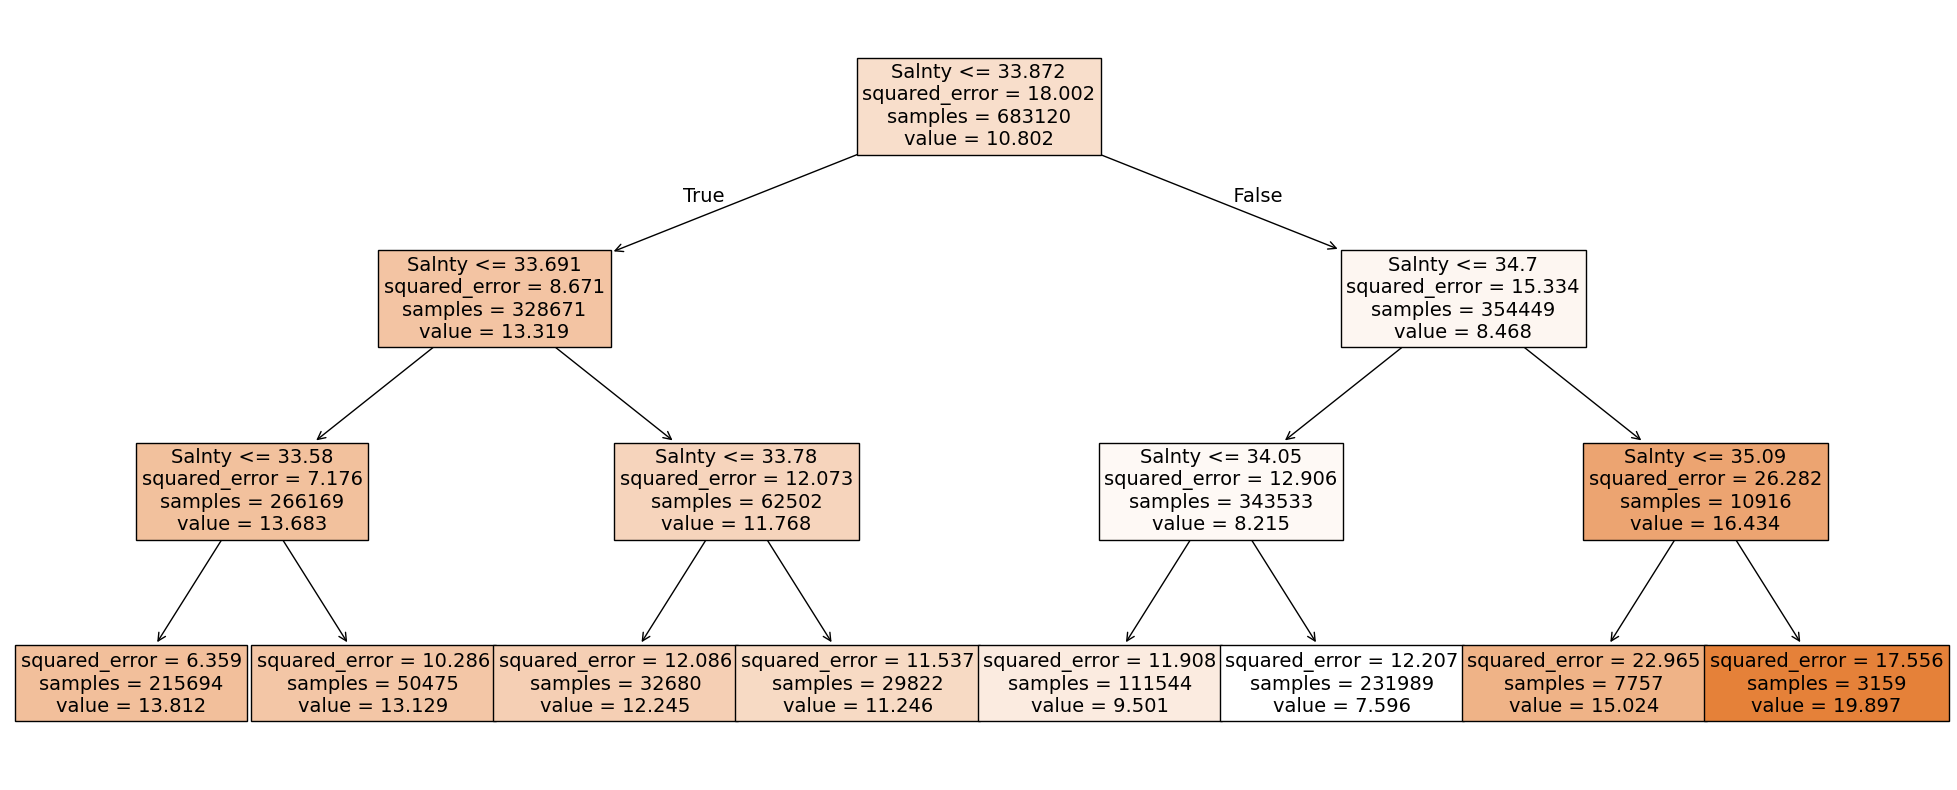

In [39]:
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14);

In [40]:
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

10.28185654297805

In [41]:
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

10.406557382587568

In [42]:
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
Salnty,0.849009


The graph displaying tree depth versus accuracy indicates some important insights into the decision tree model's performance. As the tree depth increases, both the training accuracy and test accuracy decrease, which is unusual because typically, increasing depth allows the model to better fit the training data. This suggests that the model might be struggling with overfitting or underfitting. The decrease in accuracy could also point to issues in the data, such as noise or the absence of key features, which cause the model to perform poorly as its complexity grows.
The Mean Squared Error (MSE) values of 10.28 for training and 10.41 for testing indicate that the model is performing reasonably well, as the MSE is fairly consistent between the training and test sets. The small difference between the training and test MSE values suggests that the model is not overfitting, and its performance generalizes well across unseen data. However, the MSE values also imply that the model’s predictions are still off by an average of around 3.2 degrees. This may not be ideal for certain applications, especially when high precision is required.
Additionally, the correlation coefficient (r) of 0.85 indicates a strong positive linear relationship between salinity and temperature. This suggests that the model is capturing significant patterns in the data, with salinity being a good predictor of temperature. However, despite the high r-value, the increasing depth and the consistent MSE values show that there might be room for improvement in the model. The goal should be to reduce the MSE while maintaining or improving the correlation between the features and target variable.


##Random Forest

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Salnty']]
y = df['T_degC']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


feature_importances = rf_model.feature_importances_
print(f"Feature Importances: {feature_importances}")

Mean Squared Error: 9.492094490023328
R-squared: 0.46908344259798607
Feature Importances: [1.]


In [88]:
cat_col = []
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [105]:
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])
param_grid = {'model__n_estimators': [50],'model__max_depth': [8]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  *,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         [])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [8], 'model__n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [106]:
grid_search.best_params_

{'model__max_depth': 8, 'model__n_estimators': 50}

In [107]:
y_train_preds = rf_model.predict(X_train)
mean_squared_error(y_train, y_train_preds)

9.291709791851535

In [108]:
y_test_preds = rf_model.predict(X_test)
mean_squared_error(y_test, y_test_preds)

9.492094490023328

In [109]:
r = permutation_importance(rf_model, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.944596


The Random Forest model’s results suggest that salinity has a moderate relationship with temperature, but there is room for improvement. The MSE of 9.492 indicates an average prediction error of about 3.08°C, which is significant for accurate climate predictions. The R value of 0.685 shows a moderate positive linear relationship, meaning salinity is a meaningful predictor but not the sole factor influencing temperature. The R² value of 0.469 means that nearly 54.1% of temperature variation is unexplained, highlighting the complexity of predicting ocean temperature.
Given the amount of data, I am unable to use multiple parameters when grid searching for runtime reasons, this would help the model be more accurate. With the parameters given, MSE stayed about the same while r increased to over .90, this suggests that the parameters and gridsearch allowed the model to find a stronger positive linear relationship. This suggests that the model is now more precise.
Salinity’s feature importance of 1 confirms it as the most influential factor in the model, but the moderate R² and MSE suggest that other environmental factors are also important. While the model demonstrates that salinity can predict temperature to some degree, it doesn't fully capture the broader dynamics of ocean temperature and climate change. More variables need to be included to enhance prediction accuracy and better inform climate change strategies.


#Summary

Exploratory Data Analysis (EDA):
The dataset reveals that temperature ranges from 1.44°C to 31.14°C, and salinity varies between 28.431 and 37.034. It was observed that the data is symmetrically distributed, with similar values for the mean and median of both temperature and salinity. Initial visualizations, including histograms and scatter plots, highlighted a moderate positive relationship between salinity and temperature. However, while the scatter plot showed a slight increase in temperature as salinity increases, the correlation was not as strong as expected.

Modeling and Results:
Linear Regression:
The linear regression model showed a negative relationship between salinity and temperature with a coefficient of -2.1347, suggesting that as salinity increases, temperature decreases.
The Mean Squared Error (MSE) was 13.29, indicating an average error of about 3.65°C in predictions. This error margin is significant and reduces the accuracy of the model for precise climate predictions.
The correlation coefficient (r) of 0.51 suggested a moderate relationship, meaning salinity is a meaningful predictor, but other factors likely influence ocean temperature.

K-Nearest Neighbors (KNN):
The KNN model showed reasonable performance, with MSE values of 10.14 on the training set and 10.32on the test set. The error margin of around 3.2°C indicates a moderate prediction accuracy.
The r value of 0.885 indicates a strong positive correlation between salinity and temperature, but the model still has limitations, as it doesn’t account for all variables influencing temperature.

Decision Tree:
The decision tree model exhibited some unusual behavior with decreasing accuracy as tree depth increased, possibly indicating overfitting or underfitting.
The MSE values of 10.28 (training) and 10.41 (testing) were close, suggesting minimal overfitting.
The correlation coefficient (r) of 0.85 shows a strong relationship between salinity and temperature, but further refinement is needed to improve precision.

Random Forest:
The Random Forest model showed a moderate relationship with salinity having a significant influence on temperature predictions. The MSE of 9.492 indicates an average error of 3.08°C, suggesting that while the model is useful, it still has room for improvement.
The r value of 0.685 suggests that salinity is an important factor, but the model fails to capture a substantial amount of temperature variation (R² value of 0.469).
Grid search was employed to optimize the model, which resulted in a stronger linear relationship (r > 0.90) and greater precision, but still did not fully account for all environmental factors.


Key Findings:
Salinity is a meaningful predictor of ocean temperature, with salinity's feature importance being the highest among all features in the Random Forest model. However, temperature predictions are still significantly impacted by unexplained variance.
The models show that while salinity and temperature are correlated, other environmental variables (e.g., atmospheric pressure, humidity, depth, etc.) are also likely influencing temperature.
Despite the models' ability to predict temperature reasonably well, the error margin of approximately 3°C suggests that they are not sufficiently accurate for precise climate predictions.
The analysis points to the need for additional features and refinement in modeling approaches to reduce error and better capture the complexity of the relationship between salinity and temperature.




# Next Steps

 Incorporate additional environmental variables (e.g., atmospheric pressure, humidity, ocean depth, geographical factors) to improve the accuracy of predictions and capture a more comprehensive picture of oceanic temperature dynamics. Expand the dataset to include data from other oceans to reduce regional biases and improve the model’s generalizability. Explore more advanced machine learning models or techniques to better account for non-linear relationships and multiple variables influencing temperature. Refine hyperparameters and perform further grid search to optimize the performance of existing models, especially the Random Forest model, which showed potential after parameter adjustments. This analysis demonstrates that salinity can be used to predict ocean temperature to some degree, but further improvements in data collection, feature selection, and modeling techniques are necessary to make more accurate predictions.